# NSRDB and Naïve Model for Solar Power Calculation
---

**NREL**: National Renewable Energy Laboratory

**NSRDB**: National Solar Radiation Database  
Information can be found at https://nsrdb.nrel.gov  
API key Signup: https://developer.nrel.gov/signup/  
API instructions: https://developer.nrel.gov/docs/solar/nsrdb/psm3_data_download/

NSRDB is a serially complete collection of meteorological and solar irradiance data sets for the United States and a growing list of international locations. NSRDB uses a physics-based modeling (PSM: Physical Solar Model) approach to provide solar radiation data for the entire United States in gridded segments (4x4 square kilometer) using geostationary satellites. Data can be accessed via an API.

A simple normalization procedure is then used to convert the Global Horizontal Irradiance (GHI) to power output.

In [1]:
from powersimdata.input.grid import Grid
from prereise.gather.solardata.nsrdb import naive
from prereise.gather.solardata.helpers import to_reise

import getpass
from matplotlib import pyplot

## 1. Solar plants in Network

In [2]:
grid = Grid("Texas")
solar_plant = grid.plant.groupby('type').get_group('solar')

Reading bus.csv
Reading plant.csv
Reading gencost.csv
Reading branch.csv
Reading dcline.csv
Reading sub.csv
Reading bus2sub.csv
Reading zone.csv


In [3]:
solar_plant.head()

,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,type,interconnect,GenFuelCost,GenIOB,GenIOC,GenIOD,zone_id,zone_name,lat,lon
plant_id,,,,,,,,,,,,,,,,,,,,,
12878,3001011,9.99,0.0,0.0,0.0,1.00,12.00,1,10.0,3.00,...,solar,Texas,0.0,0.0,0.0,0,301,Far West,29.6000,-104.3000
12896,3001062,0.00,0.0,0.0,0.0,1.01,1.80,0,1.5,0.45,...,solar,Texas,0.0,0.0,0.0,0,301,Far West,32.2732,-101.4220
12897,3001063,0.00,0.0,0.0,0.0,1.01,276.00,0,230.0,69.00,...,solar,Texas,0.0,0.0,0.0,0,301,Far West,32.2732,-101.4220
12984,3003120,29.70,0.0,0.0,0.0,1.00,47.52,1,39.6,11.88,...,solar,Texas,0.0,0.0,0.0,0,303,West,29.3289,-100.3840
13161,3006085,1.05,0.0,0.0,0.0,1.04,1.68,1,1.4,0.42,...,solar,Texas,0.0,0.0,0.0,0,306,South Central,30.5570,-97.6903


In [4]:
print("There are %d solar plants in the Western grid." % len(solar_plant))

There are 36 solar plants in the Western grid.


## 2. Downloading Data
Visit https://developer.nrel.gov/signup/ to get your API key.

In [5]:
email = getpass.getpass(prompt='email=')
key = getpass.getpass(prompt='api_key=')
data = naive.retrieve_data(solar_plant, email, key)

email=········
api_key=········


100%|██████████| 17/17 [00:33<00:00,  2.15s/it]


In [6]:
data.tail(n=20)

,Pout,plant_id,ts,ts_id
316204,0.000000,13310,2016-12-31 23:00:00,8784
316205,0.000000,13311,2016-12-31 23:00:00,8784
316206,0.000000,13312,2016-12-31 23:00:00,8784
316207,0.000000,13313,2016-12-31 23:00:00,8784
316208,0.000000,13384,2016-12-31 23:00:00,8784
316209,0.000000,13405,2016-12-31 23:00:00,8784
316210,0.042672,13993,2016-12-31 23:00:00,8784
316211,0.016559,13994,2016-12-31 23:00:00,8784
316212,0.014787,13995,2016-12-31 23:00:00,8784
316213,0.009225,13996,2016-12-31 23:00:00,8784


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [7]:
plant_id = 12897
data_oneplant = data[data.plant_id == plant_id].set_index("ts", drop=True).drop(
    ["plant_id", "ts_id"], axis=1) * solar_plant.loc[plant_id, "Pmax"]

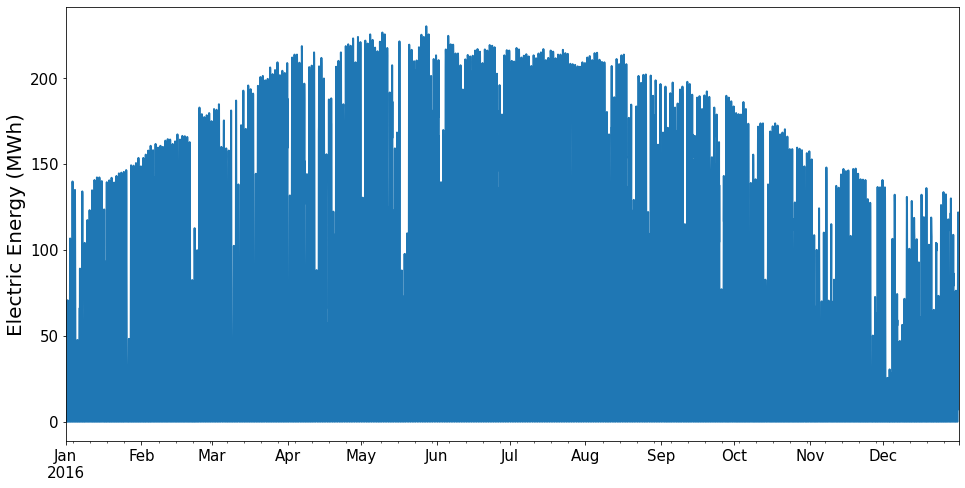

In [8]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant.plot(ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

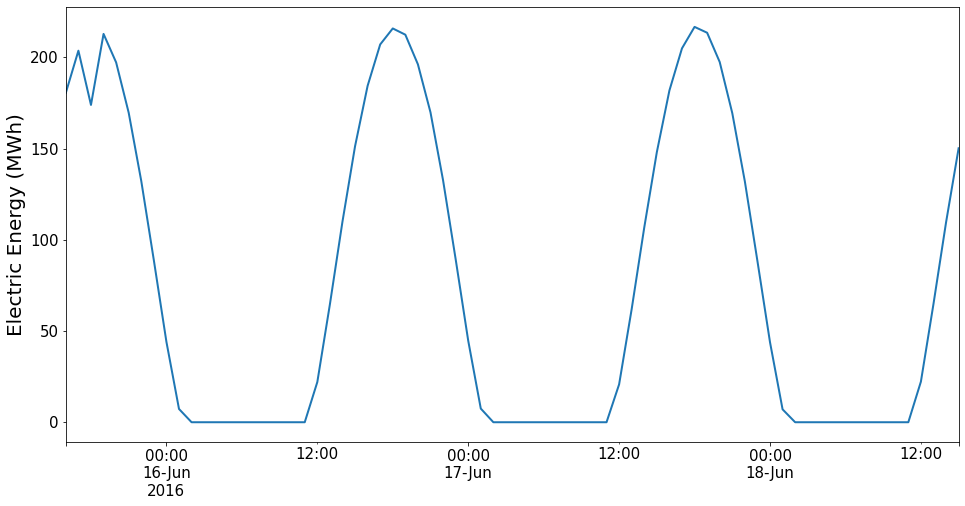

In [9]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant[4000:4072].plot(ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

## 4. Format Data
Data are formated for REISE

In [10]:
data_reise = to_reise(data)

In [11]:
data_reise.tail()

,12878,12896,12897,12984,13161,13162,13163,13164,13165,13166,...,13997,13998,13999,14000,14001,14002,14003,14004,14005,14006
UTC,,,,,,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,0.328111,0.520000,0.520000,0.049257,0.228271,0.228271,0.228271,0.228271,0.228271,0.228271,...,0.114391,0.182070,0.182070,0.490233,0.439703,0.162488,0.182070,0.454296,0.490233,0.229981
2016-12-31 20:00:00,0.294009,0.453023,0.453023,0.042751,0.192932,0.192932,0.192932,0.192932,0.192932,0.192932,...,0.100554,0.159889,0.159889,0.428837,0.388683,0.142061,0.159889,0.405850,0.428837,0.200186
2016-12-31 21:00:00,0.228571,0.335814,0.335814,0.031599,0.137536,0.137536,0.137536,0.137536,0.137536,0.137536,...,0.075646,0.121072,0.121072,0.320000,0.295918,0.107707,0.121072,0.314442,0.320000,0.147114
2016-12-31 22:00:00,0.140092,0.184186,0.184186,0.017658,0.067813,0.067813,0.067813,0.067813,0.067813,0.067813,...,0.043358,0.069316,0.069316,0.177674,0.172542,0.061281,0.069316,0.190128,0.177674,0.079143
2016-12-31 23:00:00,0.043318,0.031628,0.031628,0.002788,0.004776,0.004776,0.004776,0.004776,0.004776,0.004776,...,0.009225,0.014787,0.014787,0.032558,0.041744,0.012999,0.014787,0.054845,0.032558,0.012104
